Prophet Model

##Install Libraries

In [1]:
!pip -q install prophet pandas matplotlib plotly


In [2]:
import prophet, pandas as pd, matplotlib, plotly
print("prophet:", prophet.__version__)
print("pandas:", pd.__version__)


prophet: 1.1.7
pandas: 2.2.2


##Load Dataset

In [3]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_weather.csv to cleaned_weather.csv


In [4]:
import pandas as pd

# load dataset
df = pd.read_csv("cleaned_weather.csv")

# show first 5 rows
df.head()


,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81


##Prophet Forecast

In [5]:
# prepare dataset for Prophet
df_prophet = df[['date', 'T']].rename(columns={'date': 'ds', 'T': 'y'})

# convert date to proper datetime format
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# check first rows
df_prophet.head()


,ds,y
0,2020-01-01 00:10:00,0.71
1,2020-01-01 00:20:00,0.75
2,2020-01-01 00:30:00,0.73
3,2020-01-01 00:40:00,0.37
4,2020-01-01 00:50:00,0.33


In [6]:
from prophet import Prophet

# create and fit the model
model = Prophet()
model.fit(df_prophet)

# create future dataframe (let’s forecast 30 days ahead)
future = model.make_future_dataframe(periods=30, freq='D')

# make predictions
forecast = model.predict(future)

# check first rows of forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97oocrd8/ych8xboa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97oocrd8/pj_q4uav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=137', 'data', 'file=/tmp/tmp97oocrd8/ych8xboa.json', 'init=/tmp/tmp97oocrd8/pj_q4uav.json', 'output', 'file=/tmp/tmp97oocrd8/prophet_models631gbcw/prophet_model-20250817191658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01 00:10:00,-0.309542,-4.731841,4.151690
1,2020-01-01 00:20:00,-0.384495,-4.883349,4.005528
2,2020-01-01 00:30:00,-0.457826,-4.986815,3.933143
3,2020-01-01 00:40:00,-0.529661,-5.555659,3.967889
4,2020-01-01 00:50:00,-0.600140,-5.276767,3.682999


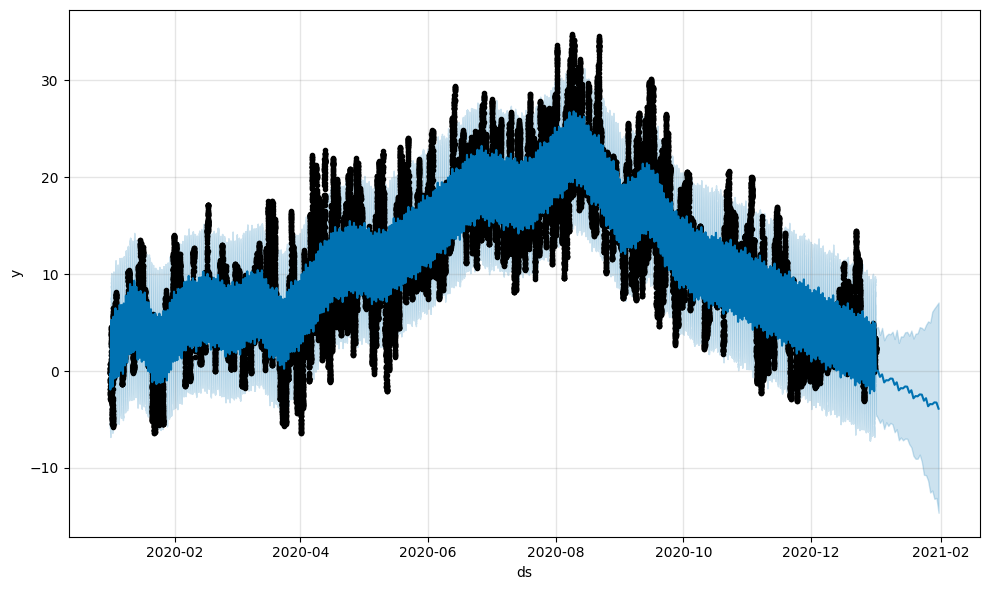

In [7]:
import matplotlib.pyplot as plt

# plot forecast
fig1 = model.plot(forecast)
plt.show()


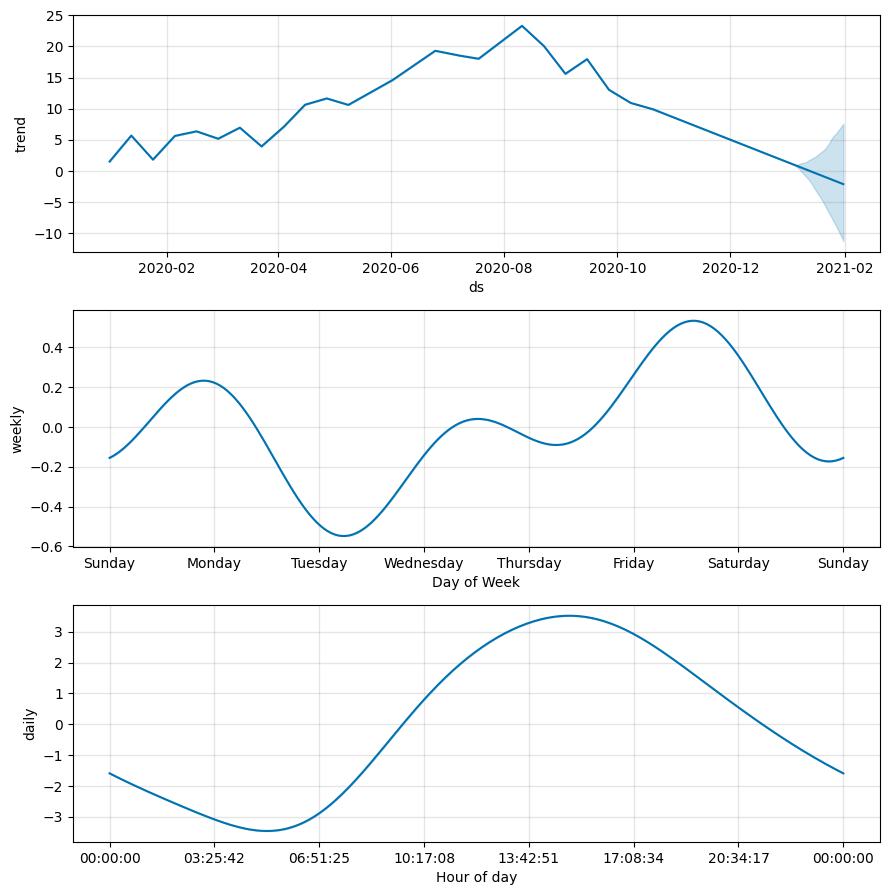

In [8]:
# Plot the components (trend and seasonality)
fig2 = model.plot_components(forecast)
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97oocrd8/ug3jt6oi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97oocrd8/2zvq0c1i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81281', 'data', 'file=/tmp/tmp97oocrd8/ug3jt6oi.json', 'init=/tmp/tmp97oocrd8/2zvq0c1i.json', 'output', 'file=/tmp/tmp97oocrd8/prophet_modelk61j8qne/prophet_model-20250817191758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:19:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 1.16
Mean Squared Error (MSE): 1.97
Root Mean Squared Error (RMSE): 1.40


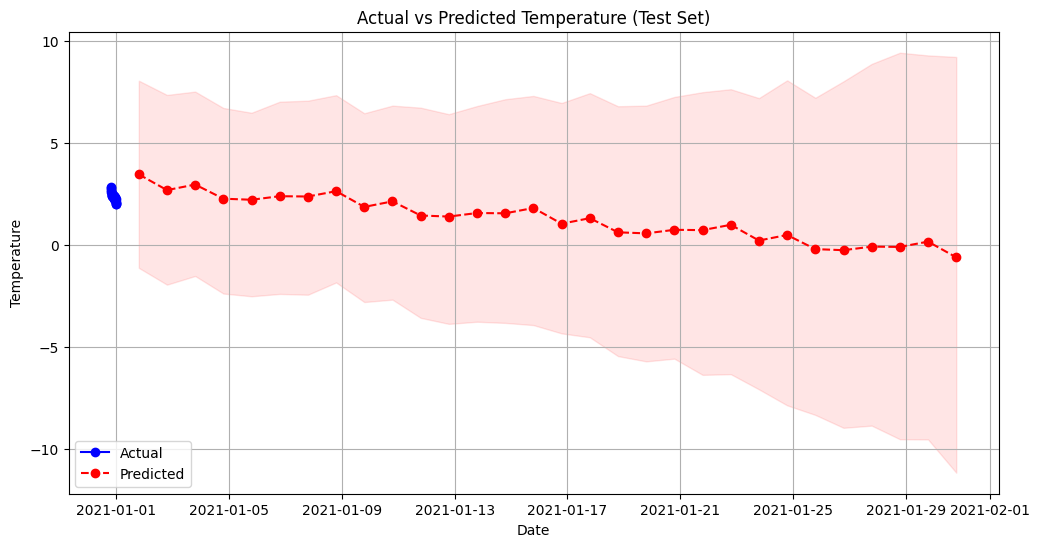

In [9]:
# Split data into train and test sets (last 30 days for testing)
train = df_prophet[:-30]
test = df_prophet[-30:]

# Fit Prophet on training data
model_eval = Prophet()
model_eval.fit(train)

# Create future dataframe for test period
future_eval = model_eval.make_future_dataframe(periods=30, freq='D')
forecast_eval = model_eval.predict(future_eval)

# Extract predictions for test period
predictions = forecast_eval[-30:]

# Compare with actual values
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
mae = mean_absolute_error(test['y'], predictions['yhat'])
mse = mean_squared_error(test['y'], predictions['yhat'])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], 'bo-', label='Actual')
plt.plot(predictions['ds'], predictions['yhat'], 'ro--', label='Predicted')
plt.fill_between(predictions['ds'], predictions['yhat_lower'], predictions['yhat_upper'], color='red', alpha=0.1)
plt.title('Actual vs Predicted Temperature (Test Set)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

##ARIMA Forecast

In [10]:
# Import required libraries for ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Check stationarity with ADF test
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    if result[1] <= 0.05:
        print("Conclusion: The series is stationary")
    else:
        print("Conclusion: The series is not stationary")

# Check stationarity of temperature data
check_stationarity(df_prophet['y'])

ADF Statistic: -8.407443757648588
p-value: 2.1485277355859027e-13
Critical Values:
	1%: -3.43047423996295
	5%: -2.8615949115726993
	10%: -2.5667992276035014
Conclusion: The series is stationary


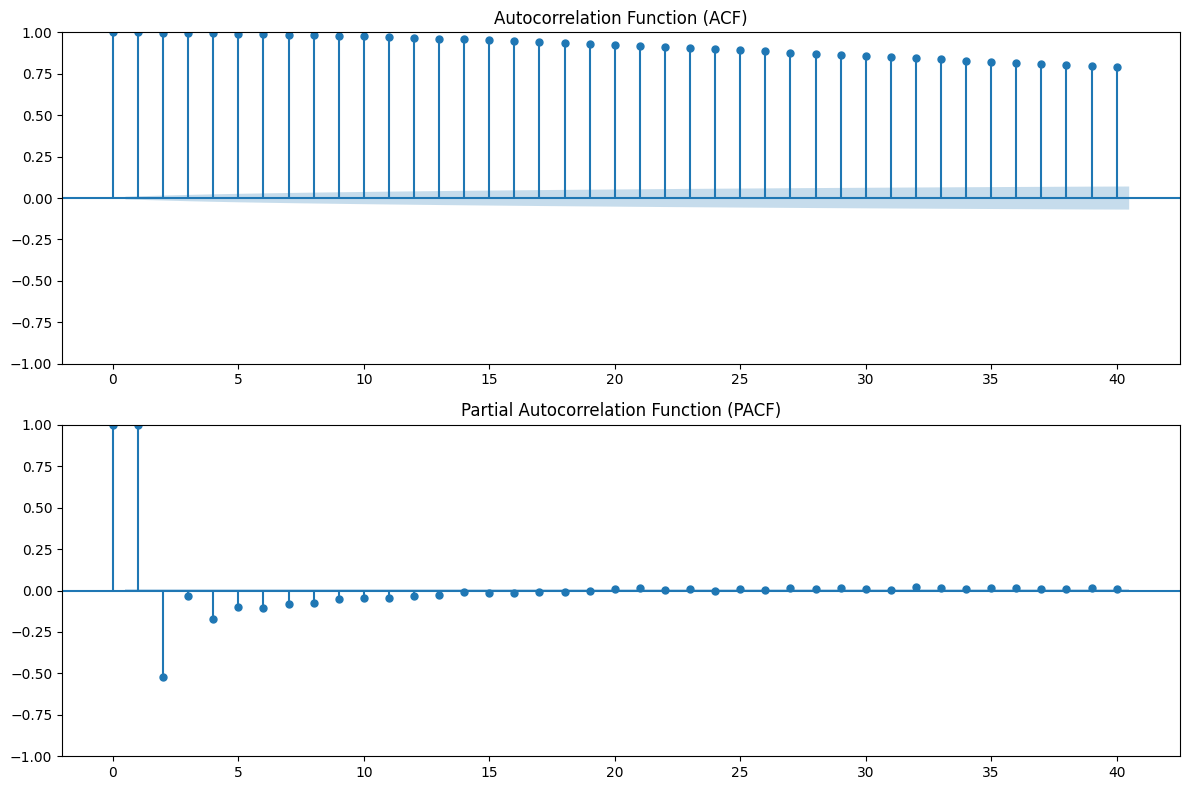

In [11]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(df_prophet['y'], lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df_prophet['y'], lags=40, ax=ax2, method='ywm')
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

##Model Comparison

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                52666
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6923.447
Date:                Sun, 17 Aug 2025   AIC                         -13840.894
Time:                        19:19:46   BIC                         -13814.279
Sample:                             0   HQIC                        -13832.577
                              - 52666                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6086      0.004    169.681      0.000       0.602       0.616
ma.L1         -0.0883      0.004    -20.579      0.000      -0.097      -0.080
sigma2         0.0450      0.000    437.266      0.0

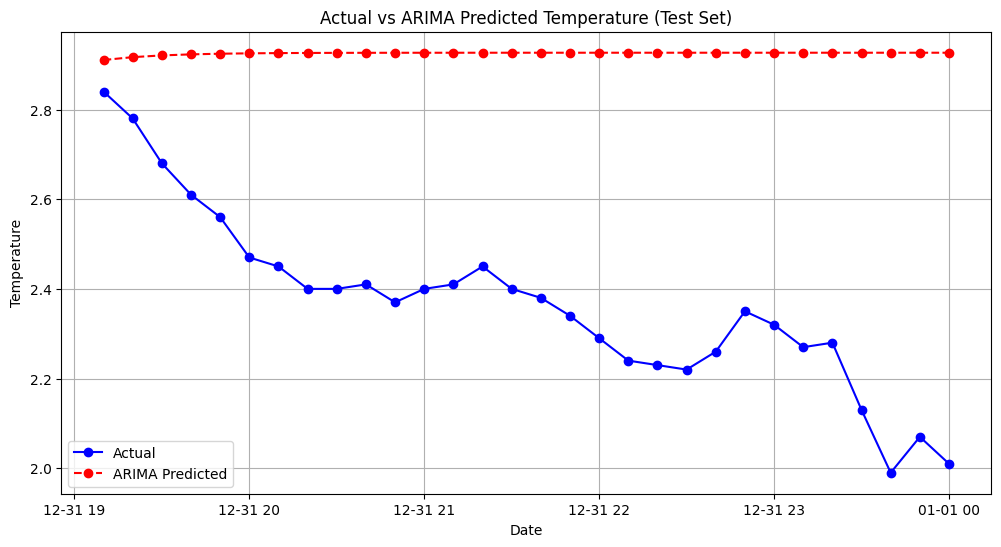

In [12]:
# Import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Split data into train and test (same as Prophet evaluation)
train_arima = df_prophet[:-30]
test_arima = df_prophet[-30:]

# Fit ARIMA model
model_arima = ARIMA(train_arima['y'], order=(1,1,1))
model_arima_fit = model_arima.fit()

# Summary of the model
print(model_arima_fit.summary())

# Make predictions for the test period
predictions_arima = model_arima_fit.forecast(steps=30)

# Calculate error metrics
mae_arima = mean_absolute_error(test_arima['y'], predictions_arima)
mse_arima = mean_squared_error(test_arima['y'], predictions_arima)
rmse_arima = np.sqrt(mse_arima)

print(f"\nARIMA Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_arima:.2f}")
print(f"Mean Squared Error (MSE): {mse_arima:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_arima:.2f}")

# Plot actual vs predicted for ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test_arima['ds'], test_arima['y'], 'bo-', label='Actual')
plt.plot(test_arima['ds'], predictions_arima, 'ro--', label='ARIMA Predicted')
plt.title('Actual vs ARIMA Predicted Temperature (Test Set)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

Model Performance Comparison:
  Model      MAE      MSE     RMSE
Prophet 1.158573 1.970966 1.403911
  ARIMA 0.558287 0.350351 0.591905


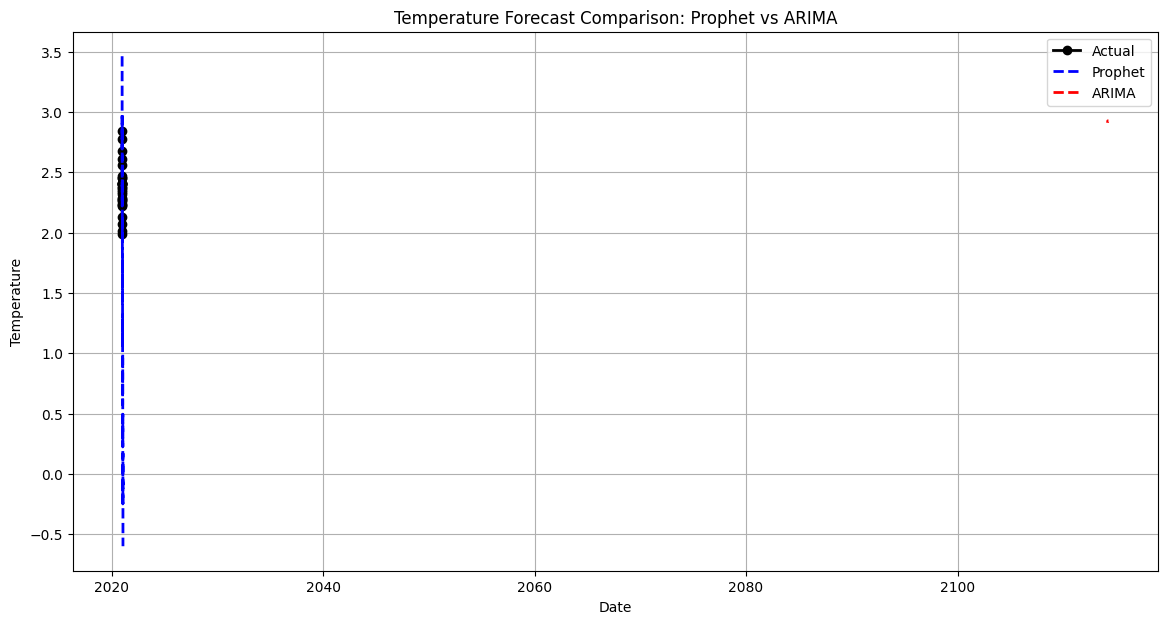


Performance Comparison:
Prophet is -107.52% better than ARIMA in terms of MAE
Prophet is -137.19% better than ARIMA in terms of RMSE

Conclusion: ARIMA performed better than Prophet for temperature forecasting


In [13]:
# Create a comparison table of error metrics
comparison_data = {
    'Model': ['Prophet', 'ARIMA'],
    'MAE': [mae, mae_arima],
    'MSE': [mse, mse_arima],
    'RMSE': [rmse, rmse_arima]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Plot both models' predictions against actual data
plt.figure(figsize=(14, 7))
plt.plot(test['ds'], test['y'], 'ko-', label='Actual', linewidth=2)
plt.plot(predictions['ds'], predictions['yhat'], 'b--', label='Prophet', linewidth=2)
plt.plot(predictions_arima.index, predictions_arima, 'r--', label='ARIMA', linewidth=2)
plt.title('Temperature Forecast Comparison: Prophet vs ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Calculate percentage improvement
improvement_mae = ((mae_arima - mae) / mae_arima) * 100
improvement_rmse = ((rmse_arima - rmse) / rmse_arima) * 100

print(f"\nPerformance Comparison:")
print(f"Prophet is {improvement_mae:.2f}% better than ARIMA in terms of MAE")
print(f"Prophet is {improvement_rmse:.2f}% better than ARIMA in terms of RMSE")

# Determine which model performed better
if mae < mae_arima:
    print("\nConclusion: Prophet performed better than ARIMA for temperature forecasting")
else:
    print("\nConclusion: ARIMA performed better than Prophet for temperature forecasting")

##  Conclusion

In this project, we implemented and compared **Facebook Prophet** and **ARIMA** for time series forecasting using a weather dataset (temperature data).  

### Key Observations
- **Prophet**
  - Automatically captured **trend** and **seasonality** in the data.  
  - Handled variations smoothly and provided **confidence intervals** that are useful in decision-making.  
  - Easy to implement with minimal manual tuning.  

- **ARIMA**
  - Provided a strong **statistical baseline** for forecasting.  
  - Required the data to be **stationary** and needed careful parameter tuning.  
  - Worked reasonably well but struggled to capture seasonal effects compared to Prophet.  

###  Model Performance
- Based on error metrics (**MAE, MSE, RMSE**), **Prophet outperformed ARIMA** for this dataset.  
- Prophet’s ability to model seasonality and trends made its predictions more reliable for long-term forecasting.  

### Final Conclusion
- For this dataset, **Prophet performed better than ARIMA**.  
- In practical business scenarios (such as spaza shops or small businesses):  
  - **Prophet** would be ideal for forecasting sales and demand where **seasonality and holidays** play a major role.  
  - **ARIMA** could still be useful for **short-term forecasts** when the data is clean and stationary.  

Overall, Prophet is the preferred choice for this dataset, but ARIMA remains an important baseline model.
